<a href="https://colab.research.google.com/github/cammoore41/Chicago-Sidewalks/blob/main/Sidewalk_Cafe_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Data and Packages

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Basic EDA

In [3]:
#Data was missing some zipcodes, which could easily be attained by a simple script in Google Maps API (might have to run a couple times on free version): 
# function geo2zip(a) {
#   var response=Maps.newGeocoder()
#     .reverseGeocode(lat(a),long(a));
#   return response.results[0].formatted_address.split(',')[2].trim().split(' ')[1];
# }
# function lat(pointa) {
#  var response = Maps.newGeocoder()
#      .geocode(pointa);
#   return response.results[0].geometry.location.lat
# }
# function long(pointa) {
#   var response = Maps.newGeocoder()
#      .geocode(pointa);
#   return response.results[0].geometry.location.lng
# }

In [4]:
cafe_df=pd.read_csv('/content/Sidewalk_Cafe_Permits_CLEAN.csv')

In [5]:
cafe_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19066 entries, 0 to 19065
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PERMIT NUMBER           19066 non-null  int64  
 1   ACCOUNT NUMBER          19066 non-null  int64  
 2   SITE NUMBER             19066 non-null  int64  
 3   LEGAL NAME              19066 non-null  object 
 4   DOING BUSINESS AS NAME  19066 non-null  object 
 5   ISSUED DATE             19066 non-null  object 
 6   EXPIRATION DATE         19066 non-null  object 
 7   PAYMENT DATE            19066 non-null  object 
 8   ADDRESS                 19066 non-null  object 
 9   ADDRESS NUMBER START    19066 non-null  object 
 10  ADDRESS NUMBER          19066 non-null  object 
 11  STREET DIRECTION        19066 non-null  object 
 12  STREET                  19066 non-null  object 
 13  STREET TYPE             17912 non-null  object 
 14  CITY                    19066 non-null

In [6]:
cafe_df.describe()

PERMIT NUMBER  ACCOUNT NUMBER  ...      LATITUDE     LONGITUDE
count   1.906600e+04    19066.000000  ...  19063.000000  19063.000000
mean    1.094390e+06   196166.841498  ...     41.914241    -87.655791
std     3.796881e+04   151374.143346  ...      0.038167      0.032612
min     1.000571e+06       12.000000  ...     41.690670    -87.834308
25%     1.071991e+06    21550.000000  ...     41.889260    -87.671522
50%     1.101767e+06   246520.000000  ...     41.904313    -87.649500
75%     1.123489e+06   336717.000000  ...     41.943102    -87.631488
max     1.147402e+06   469285.000000  ...     42.019421    -87.535139

[8 rows x 9 columns]

In [7]:
cafe_df.head(5)

PERMIT NUMBER  ...                                 LOCATION
0        1144991  ...   (41.9030710919784, -87.67783097051901)
1        1144992  ...  (41.88569921913806, -87.65184383069963)
2        1144464  ...   (41.91067609090565, -87.6348427365926)
3        1145562  ...  (41.84459718759861, -87.71831255053898)
4        1145872  ...  (41.93194600914831, -87.72344452041501)

[5 rows x 24 columns]

In [155]:
cafe_df.duplicated().sum()
#No duplicate entries

0

In [8]:
cafe_df.keys()

Index(['PERMIT NUMBER', 'ACCOUNT NUMBER', 'SITE NUMBER', 'LEGAL NAME',
       'DOING BUSINESS AS NAME', 'ISSUED DATE', 'EXPIRATION DATE',
       'PAYMENT DATE', 'ADDRESS', 'ADDRESS NUMBER START', 'ADDRESS NUMBER',
       'STREET DIRECTION', 'STREET', 'STREET TYPE', 'CITY', 'STATE',
       'ZIP CODE', 'WARD', 'PRECINCT', 'WARD PRECINCT', 'POLICE DISTRICT',
       'LATITUDE', 'LONGITUDE', 'LOCATION'],
      dtype='object')

In [9]:
permit=cafe_df['PERMIT NUMBER']
account=cafe_df['ACCOUNT NUMBER']
site=cafe_df['SITE NUMBER']
legname=cafe_df['LEGAL NAME']
busname=cafe_df['DOING BUSINESS AS NAME']
issdate=cafe_df['ISSUED DATE']
expdate=cafe_df['EXPIRATION DATE']
paydate=cafe_df['PAYMENT DATE']
street=cafe_df['STREET']
city=cafe_df['CITY']
state=cafe_df['STATE']
zipcode=cafe_df['ZIP CODE']
ward=cafe_df['WARD']
precinct=cafe_df['PRECINCT']
police=cafe_df['POLICE DISTRICT']
latitude=cafe_df['LATITUDE']
longitude=cafe_df['LONGITUDE']

In [10]:
#Data Dictionary
print('Number of unique permit numbers:',permit.nunique())
print('Number of unique account numbers:',account.nunique(dropna='TRUE'))
print('Site Numbers:',site.unique())
print('Number of legal names:',legname.nunique())
print('Number of business names:',busname.nunique()) 
print('Number of issued dates:',issdate.nunique(dropna='TRUE'))
print('Expiration dates:',expdate.unique())
print('Number of payment dates:',paydate.nunique())
print('Street name:', street.unique())
print('City:',city.unique())
print('State:',state.unique())
print('Zip Code:',zipcode.unique())
print('Ward:',ward.unique())
print('Precinct:',precinct.unique())
print('Police District:',police.unique())
print('Latitude:',latitude.nunique())
print('Longitude:',longitude.nunique())
#The rest of the variables are not relevant to this project.

Number of unique permit numbers: 19066
Number of unique account numbers: 2964
Site Numbers: [  1   2   4  11  19  21  28  10  65   3  62  23  12  13  31  48  29  39
  54  56   7  58   9  35  15   5  14   8   6  17  80  70  92  91  90 115
  84  93 112 131  34 158 156  38 137  50  33 125 178  79  74  44 134  27
 101 130  18  20 110  16  26  37  82 111  24 120  78 173  46 124  43  42
 139 105  41  77 167 103 136 161  47 147 164  32  98  66  57  51  55  30]
Number of legal names: 2962
Number of business names: 3002
Number of issued dates: 2560
Expiration dates: ['2/28/2021' '2/29/2020' '12/1/2018' '2/28/2019' '2/28/2018' '12/1/2017'
 '12/1/2016' '12/1/2015' '12/1/2014' '12/1/2013' '12/1/2012' '12/1/2011'
 '12/1/2010' '12/1/2009' '2/10/2014' '12/1/2008' '12/1/2007' '2/28/2009'
 '12/1/2006' '12/1/2005' '11/1/2004' '11/1/2002' '11/1/2003' '11/1/2001']
Number of payment dates: 2485
Street name: ['DIVISION' 'LAKE' 'WELLS' 'RIDGEWAY' 'DIVERSEY' 'NORTHWEST' 'CHICAGO'
 'GRAND' '37TH' 'ILLINOIS' 'L

### Drop columns that aren't relevant

In [11]:
#Drops rows that have missing values
#cafe_df_2=cafe_df.dropna(subset=['ADDRESS NUMBER START','ADDRESS NUMBER','STREET DIRECTION','STREET TYPE', 'PRECINCT','WARD PRECINCT','LATITUDE','LONGITUDE','LOCATION'])

In [12]:
cafe_df_2=cafe_df.drop(columns=['ADDRESS NUMBER START','ADDRESS NUMBER','STREET DIRECTION','STREET TYPE', 'PRECINCT','WARD PRECINCT','LATITUDE','LONGITUDE','LOCATION'])

In [13]:
cafe_df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19066 entries, 0 to 19065
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PERMIT NUMBER           19066 non-null  int64  
 1   ACCOUNT NUMBER          19066 non-null  int64  
 2   SITE NUMBER             19066 non-null  int64  
 3   LEGAL NAME              19066 non-null  object 
 4   DOING BUSINESS AS NAME  19066 non-null  object 
 5   ISSUED DATE             19066 non-null  object 
 6   EXPIRATION DATE         19066 non-null  object 
 7   PAYMENT DATE            19066 non-null  object 
 8   ADDRESS                 19066 non-null  object 
 9   STREET                  19066 non-null  object 
 10  CITY                    19066 non-null  object 
 11  STATE                   19066 non-null  object 
 12  ZIP CODE                19066 non-null  int64  
 13  WARD                    19066 non-null  int64  
 14  POLICE DISTRICT         19024 non-null

In [15]:
cafe_df_2[['ISSUED DATE','EXPIRATION DATE','PAYMENT DATE']]
#Want to extract month and year from this m/d/y format

ISSUED DATE EXPIRATION DATE PAYMENT DATE
0        2/4/2021       2/28/2021    6/17/2020
1      12/23/2020       2/28/2021    6/17/2020
2      12/21/2020       2/28/2021    7/29/2020
3      12/17/2020       2/28/2021    8/25/2020
4      12/15/2020       2/28/2021    7/10/2020
...           ...             ...          ...
19061   3/20/2001       11/1/2001    3/20/2001
19062   3/20/2001       11/1/2001    3/20/2001
19063   3/19/2001       11/1/2001    3/16/2001
19064   3/15/2001       11/1/2001    3/15/2001
19065   3/14/2001       11/1/2001    3/14/2001

[19066 rows x 3 columns]

### Date


In [16]:
import datetime

In [17]:
month_date_to_short = {1: "Jan",
                       2: "Feb",
                       3: "Mar",
                       4: "Apr",
                       5: "May",
                       6: "Jun",
                       7: "Jul",
                       8: "Aug",
                       9: "Sep",
                       10: "Oct",
                       11: "Nov",
                       12: "Dec"
                      }
months_in_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

#### Issue Date

In [18]:
cafe_df_2['ISSUED DATE YEAR']=pd.DatetimeIndex(cafe_df_2['ISSUED DATE']).year
cafe_df_2['ISSUED DATE MONTH']=pd.DatetimeIndex(cafe_df_2['ISSUED DATE']).month.map(month_date_to_short)

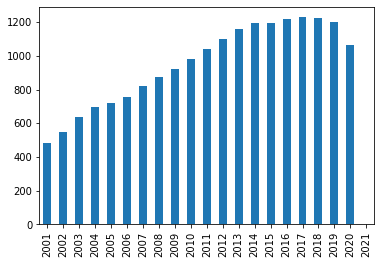

In [19]:
cafe_df_2['ISSUED DATE YEAR'].value_counts().sort_index().plot(kind='bar')

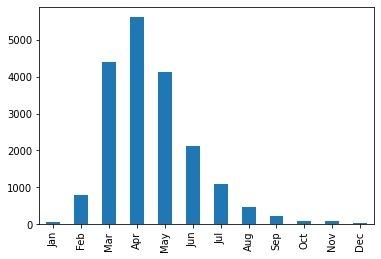

In [20]:
cafe_df_2['ISSUED DATE MONTH'].value_counts().reindex(months_in_order).plot(kind='bar')

In [31]:
last_four_years_issued=pd.pivot_table(cafe_df_2[(cafe_df_2['ISSUED DATE YEAR']>2016) & (cafe_df_2['ISSUED DATE YEAR']<2021)], index='ISSUED DATE MONTH', columns='ISSUED DATE YEAR', values='PERMIT NUMBER', aggfunc=np.count_nonzero)

In [32]:
last_four_years_issued=last_four_years_issued.reindex(months_in_order)
last_four_years_issued

ISSUED DATE YEAR    2017   2018   2019   2020
ISSUED DATE MONTH                            
Jan                  2.0    7.0   37.0    1.0
Feb                 56.0   49.0  127.0   68.0
Mar                337.0  394.0  241.0  185.0
Apr                428.0  394.0  395.0   51.0
May                184.0  154.0  172.0   38.0
Jun                147.0  131.0  111.0  277.0
Jul                 37.0   62.0   66.0  245.0
Aug                 27.0   17.0   26.0   89.0
Sep                  4.0    4.0   13.0   48.0
Oct                  4.0    4.0    4.0   24.0
Nov                  2.0    5.0    4.0   30.0
Dec                  NaN    3.0    2.0    9.0

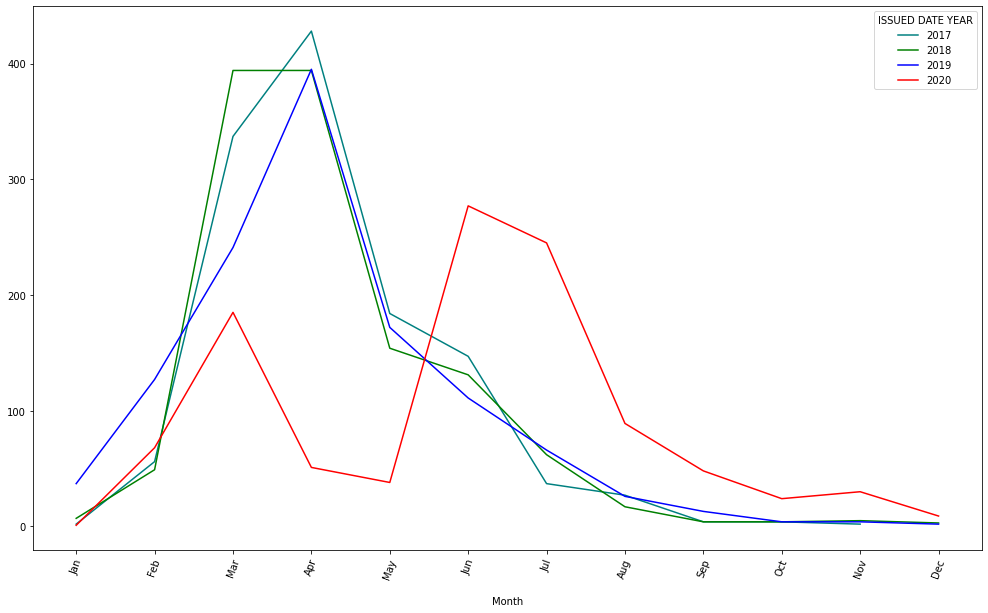

In [34]:
last_four_years_issued.plot(kind='line', figsize=(17, 10), color=['teal','green', 'blue', 'red'])
plt.xlabel('Month', labelpad=16)
plt.xticks(np.arange(12), last_four_years_issued.index, rotation=70)
plt.show()

#### Payment Date

In [24]:
cafe_df_2['PAYMENT DATE YEAR']=pd.DatetimeIndex(cafe_df_2['PAYMENT DATE']).year
cafe_df_2['PAYMENT DATE MONTH']=pd.DatetimeIndex(cafe_df_2['PAYMENT DATE']).month.map(month_date_to_short)

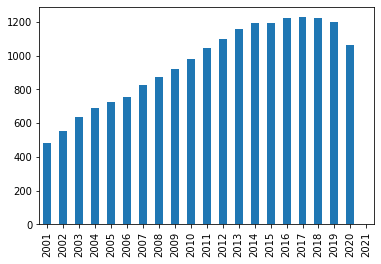

In [25]:
cafe_df_2['PAYMENT DATE YEAR'].value_counts().sort_index().plot(kind='bar')

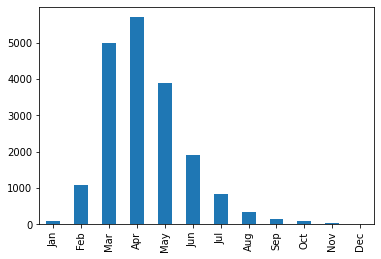

In [26]:
cafe_df_2['PAYMENT DATE MONTH'].value_counts().reindex(months_in_order).plot(kind='bar')

In [28]:
last_four_years_payment=pd.pivot_table(cafe_df_2[(cafe_df_2['PAYMENT DATE YEAR']>2016) & (cafe_df_2['PAYMENT DATE YEAR']<2021)], index='PAYMENT DATE MONTH', columns='PAYMENT DATE YEAR', values='PERMIT NUMBER', aggfunc=np.count_nonzero)

In [29]:
last_four_years_payment=last_four_years_payment.reindex(months_in_order)
last_four_years_payment

PAYMENT DATE YEAR    2017   2018   2019   2020
PAYMENT DATE MONTH                            
Jan                   1.0   39.0   37.0    1.0
Feb                  68.0   23.0  180.0  113.0
Mar                 397.0  476.0  264.0  223.0
Apr                 465.0  377.0  382.0    7.0
May                 134.0  147.0  151.0   77.0
Jun                 105.0  106.0  103.0  311.0
Jul                  32.0   38.0   55.0  193.0
Aug                  21.0   11.0   13.0   68.0
Sep                   1.0    3.0    7.0   30.0
Oct                   2.0    1.0    3.0   29.0
Nov                   NaN    3.0    3.0   10.0
Dec                   NaN    1.0    NaN    3.0

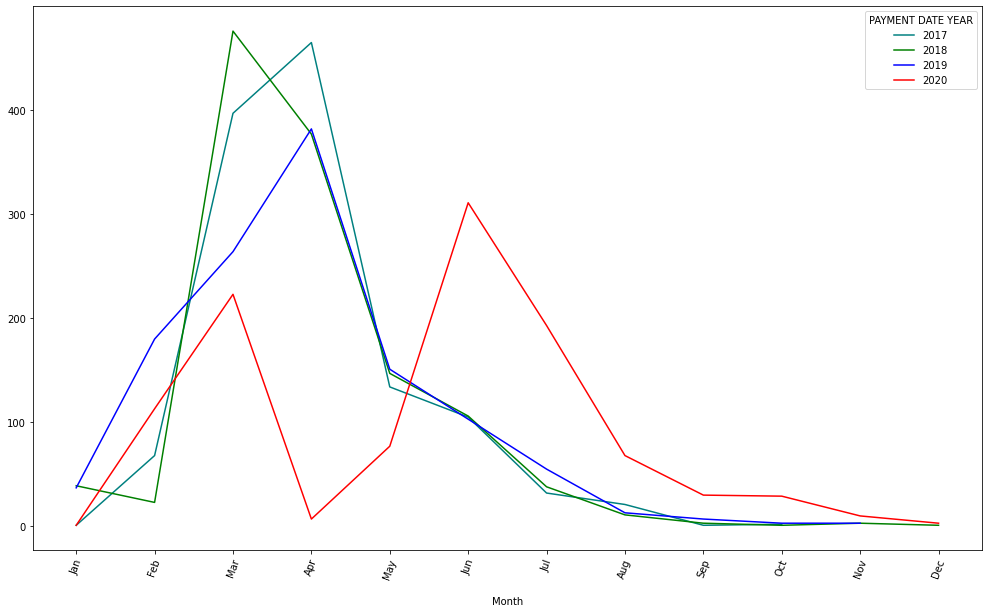

In [33]:
last_four_years_payment.plot(kind='line', figsize=(17, 10), color=['teal','green', 'blue', 'red'])
plt.xlabel('Month', labelpad=16)
plt.xticks(np.arange(12), last_four_years_payment.index, rotation=70)
plt.show()

#### Time between permit payment/issue

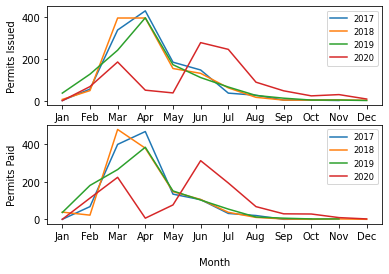

In [68]:
#Side by side comparison of Permits Issued timeline vs Permits Paid timeline
plt.subplot(2,1,1)
plt.plot(last_four_years_issued)
plt.legend(last_four_years_issued, fontsize='small')
plt.ylabel('Permits Issued')
plt.xticks(np.arange(12), last_four_years_issued.index)

plt.subplot(2,1,2)
plt.plot(last_four_years_payment)
plt.legend(last_four_years_payment, fontsize='small')
plt.xlabel('Month', labelpad=16)
plt.ylabel('Permits Paid')
plt.xticks(np.arange(12), last_four_years_payment.index)
plt.show()

In [88]:
#Look at the general difference between issue date and payment date
issuedatepaymentdate=cafe_df_2.loc[:, ('ISSUED DATE','PAYMENT DATE')]
issuedatepaymentdate['ISSUED DATE']=pd.to_datetime(issuedatepaymentdate['ISSUED DATE'], format='%m/%d/%Y')
issuedatepaymentdate['PAYMENT DATE']=pd.to_datetime(issuedatepaymentdate['PAYMENT DATE'], format='%m/%d/%Y')
issuedatepaymentdate['DIF']=(issuedatepaymentdate['ISSUED DATE']-issuedatepaymentdate['PAYMENT DATE']).dt.days

In [140]:
issuedatepaymentdate['DIF'].value_counts()
#Note: Positive differences means issued date was after payment date.
#Most payments are either day of or 1-5 days after issued

 0      10485
 1       2161
 3        737
 2        676
 5        413
        ...  
-22         1
 200        1
 116        1
-38         1
 216        1
Name: DIF, Length: 260, dtype: int64

In [149]:
issuedafter=issuedatepaymentdate['DIF']>0
issuedafter.value_counts()
#8488 issued after payment date

False    10578
True      8488
Name: DIF, dtype: int64

In [151]:
issuedbefore=issuedatepaymentdate['DIF']<0
issuedbefore.value_counts()
#93 issued before payment date

False    18973
True        93
Name: DIF, dtype: int64

Permits Issued:
* Same day as payment- 10485
* After payment- 8488
* Before payment- 93

In [146]:
#quick look to see if there are any trends in years for permits issued before payments
issuedatepaymentdate[issuedatepaymentdate['DIF']<0]

ISSUED DATE PAYMENT DATE  DIF
411    2020-07-06   2021-01-26 -204
645    2020-06-09   2020-09-21 -104
753    2020-05-13   2020-06-29  -47
1108   2019-08-07   2019-08-22  -15
3027   2018-04-02   2018-05-04  -32
...           ...          ...  ...
17467  2003-07-09   2004-07-12 -369
17607  2003-05-20   2004-02-17 -273
18367  2002-04-16   2003-04-10 -359
18559  2002-03-20   2003-03-24 -369
18992  2001-04-03   2001-10-18 -198

[93 rows x 3 columns]

(-70.7, 36.4]         17979
(36.4, 143.5]           964
(143.5, 250.6]           66
(-177.8, -70.7]          23
(250.6, 357.7]           12
(-393.072, -284.9]       10
(-284.9, -177.8]          7
(571.9, 679.0]            2
(357.7, 464.8]            2
(464.8, 571.9]            1
Name: DIF, dtype: int64


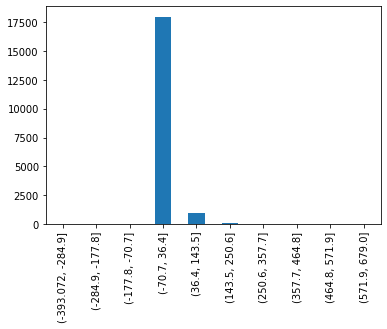

In [119]:
#Note: Positive difference=
print(issuedatepaymentdate['DIF'].value_counts(bins=10))
issuedatepaymentdate['DIF'].value_counts(bins=10,sort=False).plot(kind='bar')

###Account Number

In [156]:
#Number of unique account numbers
cafe_df_2['ACCOUNT NUMBER'].unique().size

2964

In [198]:
accountnums=cafe_df_2['ACCOUNT NUMBER'].value_counts()[cafe_df_2['ACCOUNT NUMBER'].value_counts()>1]
accountnums

63414     850
65004     271
298727    114
50161      73
230211     64
         ... 
317468      2
306059      2
428006      2
408601      2
362127      2
Name: ACCOUNT NUMBER, Length: 2249, dtype: int64

#### Starbucks

In [203]:
#Quick look at the account number with the most permits (Starbucks)
Starbs=cafe_df_2[cafe_df_2['ACCOUNT NUMBER']==63414]
Starbs

PERMIT NUMBER  ACCOUNT NUMBER  ...  PAYMENT DATE YEAR PAYMENT DATE MONTH
502          1145328           63414  ...               2020                Jun
746          1145284           63414  ...               2020                May
770          1144080           63414  ...               2020                Feb
771          1144087           63414  ...               2020                Feb
772          1144193           63414  ...               2020                Feb
...              ...             ...  ...                ...                ...
18703        1010014           63414  ...               2001                May
18704        1010016           63414  ...               2001                May
18705        1010020           63414  ...               2001                May
18706        1010022           63414  ...               2001                May
18707        1010023           63414  ...               2001                May

[850 rows x 19 columns]

In [205]:
Starbs['SITE NUMBER'].value_counts()

34     21
70     20
44     20
5      20
13     20
       ..
23      2
167     2
55      1
30      1
164     1
Name: SITE NUMBER, Length: 66, dtype: int64

In [206]:
Starbs[Starbs['SITE NUMBER']==34]

PERMIT NUMBER  ACCOUNT NUMBER  ...  PAYMENT DATE YEAR PAYMENT DATE MONTH
784          1144086           63414  ...               2020                Feb
2021         1138983           63414  ...               2019                Mar
3452         1130991           63414  ...               2018                Jan
4399         1126266           63414  ...               2017                Mar
5828         1121473           63414  ...               2016                Feb
6901         1116954           63414  ...               2015                Mar
8049         1111247           63414  ...               2014                Mar
9210         1105215           63414  ...               2013                Mar
10331        1099713           63414  ...               2012                Mar
11506        1094992           63414  ...               2011                Mar
12257        1090070           63414  ...               2010                Mar
13492        1085828           63414  ...               2009                Mar
13558        1077025           63414  ...               2008                Jul
14740        1062532           63414  ...               2007                May
14977        1061683           63414  ...               2007                Apr
15542        1050287           63414  ...               2006                May
16565        1042396           63414  ...               2005                Apr
16952        1034353           63414  ...               2004                May
17678        1027063           63414  ...               2003                May
18185        1017542           63414  ...               2002                May
18629        1010826           63414  ...               2001                Jun

[21 rows x 19 columns]

In [273]:
pd.set_option('max_rows', 3000)
pd.set_option('max_columns', 25)
pd.set_option('max_colwidth', 400)

In [266]:
Starbs.pivot_table(values='ACCOUNT NUMBER', index='SITE NUMBER', columns='ISSUED DATE YEAR',aggfunc='count', margins=True, fill_value=' ')

ISSUED DATE YEAR 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012  \
SITE NUMBER                                                                    
1                   1    1    1    1    1    1    1    1    1    1    1    1   
5                   1    1    1    1    1    1    1    1    1    1    1    1   
6                                            1    1    1    1    1    1    1   
11                  1    1    1    1    1    1    1    1    1    1    1    1   
12                  1    1    1    1    1    1    1    1    1    1    1    1   
13                  1    1    1    1    1    1    1    1    1    1    1    1   
14                  1    1    1    1    1    1    1    1    1    1    1    1   
19                                      1    1    1    1    1    1    1    1   
21                  1    1    1    1    1    1    1    1    1    1    1    1   
23                                                                             
27                  1    1    1    1    1    1    1    1    1    1    1    1   
30                            1                                                
31                  1    1    1    1                                           
32                  1    1    1    1    1    1    1    1    1    1    1    1   
33                  1    1    1    1    1    1    1    1    1    1    1    1   
34                  1    1    1    1    1    1    2    1    1    1    1    1   
35                  1    1    1    1    1    1    1    1    1    1    1    1   
37                  1    1    1    1    1    1    1    1    1    1    1    1   
38                            1    1    1    1    1    1    1    1    1    1   
42                  1    1    1    1    1    1    1    1    1    1    1    1   
43                  1    1    1    1    1    1    1    1                       
44                  1    1    1    1    1    1    1    1    1    1    1    1   
46                                      1    1    1    1    1    1    1    1   
47                            1    1    1    1    1    1    1    1    1    1   
48                  1    1    1    1    1    1    1    1    1    1    1    1   
50                  1    1    1    1    1    1    1    1    1    1    1    1   
54                                      1    1    1    1    1    1    1    1   
55                            1                                                
56                            1    1    1    1    1    1    1    1    1    1   
57                  1    1    1    1    1    1    1    1    1                  
58                                                               1    1    1   
66                  1    1    1    1    1    1    1    1    1    1    1    1   
70                  1    1    1    1    1    1    1    1    1    1    1    1   
74                  1    1    1    1    1    1    1    1    1    1    1    1   
77                            1    1    1    1    1    1    1    1    1    1   
78                                      1    1    1    1    1    1    1    1   
79                  1    1    1    1    1    1    1    1    1    1    1    1   
80                                      1    1    1    1    1    1    1    1   
82                  1    1    1    1    1    1    1    1    1    1    1    1   
84                            1    1    1    1    1    1    1    1    1    1   
90                       1    1    1    1    1    1    1    1    1    1    1   
91                                           1    1    1    1    1    1    1   
92                       1    1    1    1    1    1    1    1    1    1    1   
93                                                                             
101                                                                            
103                                     1    1    1    1    1    1    1    1   
105                                     1    1    1    1    1    1    1    1   
111                                     1    1    1    1    1    1    1    1   


#### All Accounts

In [274]:
# Number of permits issued per year per account
cafe_df_2.pivot_table(values='PERMIT NUMBER',index='ACCOUNT NUMBER', columns='ISSUED DATE YEAR',aggfunc='count', margins=True, fill_value=' ')

ISSUED DATE YEAR 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010  2011  \
ACCOUNT NUMBER                                                             
12                  1    1    1    1    1    1                             
13                  1    1    1    1    1    1    1    1    1    1     1   
16                  1    1    1    1                                       
27                                                                         
28                                                          1    1     1   
46                                      1    1    1    1    1    1     1   
51                  1    1    1    1    1    1                             
67                                 1    1    1    1    1    1    1     1   
73                            1         1    1    1    1    1    1     1   
82                                                                         
85                  1    1                                                 
102                 1    1    1    1    1    1    1    1    1    1     1   
107                 1    1    1    1                                       
118                 1    1                   1    1                        
129                 1    1    1    1    1    1    1    1    1    1     1   
131                 1    1    1    1    1    1    1    1    1    1     1   
159                                     1    1                             
161                 1    1                                                 
183                 1    1    1    1    1    1    1    1    1    1     1   
196                 1    1    1    1    1    1    1    1    1    1     1   
198                                1    1    1                   1         
207                 1    1    1    1    1    1    1    1    1    1     1   
213                 1    1    1    1    1    1    1    1    1    1     1   
232                                                                        
240                                                                        
242                 1    1    1    1    1    1    1    1    1    1     1   
259                           1    1    1    1    1    1                   
262                 1    1    1    1    1                                  
278                 1    1    1    1    1    1    1    1    1    1     1   
287                                                                        
290                                                                        
305                                                                        
307                 1    1    1    1    1    1    1    1    1    1     1   
315                 1    1    1    1    1    1    1                        
319                                                                        
343                                     1                                  
345                 1    1    1                                            
349                                                    1    1    1     1   
369                 1                                                      
399                 1    1    1    1                                       
420                 1    1    1    1    1    1    1    1    1    1     1   
1554                                                                       
1797                1    1    1    1    1    1    1    1    1    1     1   
2127                          1    1    1    1    1    1    1    1     1   
2681                1    1    1    1    1    1    1    1    1    1     1   
2938                                                   1                   
2950                1         1    1    1         1    1    1              
2962                1    1    1    1    1    1    1    1    1    1     1   
2984                1    1    1    1    1    1                             
3013                                                                       
3024                1    1    1    1    1    1  

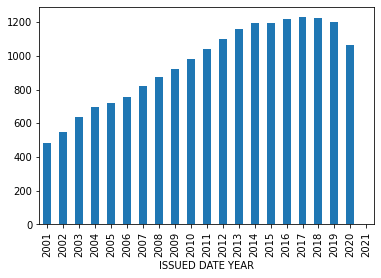

In [278]:
cafe_df_2.groupby('ISSUED DATE YEAR')['PERMIT NUMBER'].count().plot(kind='bar')

### Zip Code

In [291]:
cafe_df_2.groupby('ZIP CODE').agg({'ACCOUNT NUMBER':['count','nunique']})

ACCOUNT NUMBER        
                  count nunique
ZIP CODE                       
60601               566      94
60602               372      58
60603               281      51
60604               205      27
60605               641     100
60606               344      67
60607              1082     197
60608               149      37
60609                23       7
60610              1696     218
60611              1652     213
60612                20       8
60613              1021     172
60614              1448     221
60615               134      28
60616               227      41
60617                13       4
60618               757     127
60619                 2       1
60620                 3       2
60621                 1       1
60622              1515     265
60623                21      10
60625               570      94
60626               123      30
60628                 1       1
60629                35       5
60630                63      11
60631                58      13
60632                 3       3
60634               136      29
60637                32       8
60638                 2       1
60639                42      14
60640               745     127
60641               194      40
60642               348      61
60643                21       5
60645                42       9
60646                61       9
60647               780     154
60649                 2       1
60651                 1       1
60653                18       6
60654               648     147
60655                 2       1
60656                15       3
60657              2000     295
60659               181      41
60660               285      59
60661               438      63
60707                47       9

In [297]:
cafe_df_2.groupby(['ZIP CODE','ISSUED DATE YEAR']).agg({'ACCOUNT NUMBER':['count','nunique']})

ACCOUNT NUMBER        
                                   count nunique
ZIP CODE ISSUED DATE YEAR                       
60601    2001                         23      20
         2002                         22      19
         2003                         22      19
         2004                         22      19
         2005                         21      19
         2006                         16      14
         2007                         18      16
         2008                         22      20
         2009                         24      22
         2010                         27      25
         2011                         28      25
         2012                         30      28
         2013                         37      32
         2014                         36      33
         2015                         35      32
         2016                         37      34
         2017                         40      37
         2018                         38      35
         2019                         39      35
         2020                         29      26
60602    2001                          8       8
         2002                          6       6
         2003                         10       8
         2004                         11       9
         2005                         13      12
         2006                         13      10
         2007                         17      14
         2008                         16      14
         2009                         16      13
         2010                         18      15
         2011                         23      21
         2012                         28      25
         2013                         28      25
         2014                         27      25
         2015                         27      25
         2016                         25      23
         2017                         24      24
         2018                         24      24
         2019                         22      22
         2020                         16      16
60603    2001                          4       4
         2002                          6       6
         2003                          6       6
         2004                          9       8
         2005                         10       9
         2006                          8       7
         2007                         12      11
         2008                         13      12
         2009                         11      10
         2010                         12      11
         2011                         12      11
         2012                         15      14
         2013                         17      16
         2014                         17      15
         2015                         23      21
         2016                         22      20
         2017                         22      20
         2018                         24      21
         2019                         21      18
         2020                         17      15
60604    2001                          4       4
         2002                          4       4
         2003                          7       6
         2004                          8       8
         2005                          8       8
         2006                          9       8
         2007                          8       7
         2008                          8       7
         2009                          8       7
         2010                          9       8
         2011                         13      11
         2012                         12      10
         2013                         13      10
         2014                         12       9
         2015                         14      11
         2016                         14      11
         2017                         14      11
         2018                         16      13
         2019                         13      10
        

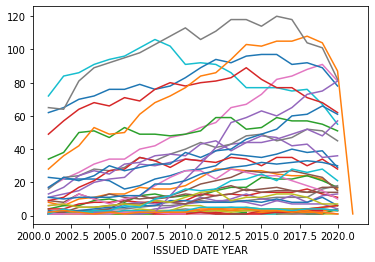

In [320]:
zipgroup=cafe_df_2.groupby(['ISSUED DATE YEAR','ZIP CODE']).agg({'ACCOUNT NUMBER':['count']})
zipgroup_2=zipgroup.unstack(level='ZIP CODE')
zipgroup_2.plot(legend=False)

### Old

In [ ]:
st=new_cafe_2['STATE']
st.unique()

array(['IL'], dtype=object)

There are no duplicated rows in this dataset.

In [ ]:
new_cafe_2.duplicated().sum()

0

In [ ]:
new_cafe_2.describe()

PERMIT NUMBER  ACCOUNT NUMBER  ...  POLICE DISTRICT  Community Areas
count   1.740000e+04    17400.000000  ...     17400.000000     17400.000000
mean    1.091186e+06   191179.296149  ...        14.633218        39.527874
std     3.685197e+04   149165.004412  ...         6.504983        16.874471
min     1.000571e+06       12.000000  ...         1.000000         1.000000
25%     1.062566e+06    21237.000000  ...        12.000000        29.000000
50%     1.100142e+06   230211.000000  ...        18.000000        37.000000
75%     1.121653e+06   326675.000000  ...        19.000000        57.000000
max     1.142666e+06   463067.000000  ...        25.000000        77.000000

[8 rows x 7 columns]

In [ ]:
new_cafe_2[new_cafe_2.STREET=='BRIAR']

PERMIT NUMBER  ACCOUNT NUMBER  ...  POLICE DISTRICT Community Areas
270        1139687          432547  ...             19.0            57.0

[1 rows x 19 columns]

In [ ]:
data=new_cafe_2

In [ ]:
data

PERMIT NUMBER  ACCOUNT NUMBER  ...  POLICE DISTRICT Community Areas
0            1142666          458934  ...             16.0            17.0
1            1142290          294900  ...             20.0            76.0
2            1142132          459163  ...              1.0            38.0
3            1142101          384478  ...             14.0            25.0
4            1142100          456144  ...             14.0            23.0
...              ...             ...  ...              ...             ...
17993        1003612          204664  ...             14.0            25.0
17994        1002993              51  ...             18.0            37.0
17995        1002652          203574  ...             10.0            32.0
17996        1001307          202156  ...             19.0            57.0
17997        1000571          201243  ...             18.0            37.0

[17400 rows x 19 columns]

In [ ]:
data['PERMIT NUMBER'].unique().size

17400

In [ ]:
data['ACCOUNT NUMBER'].size

17400

In [ ]:
data['ACCOUNT NUMBER'].unique().size

2737

So we know that there are 17400 unique permit numbers that were filed since 2001, but only 2737 different account numbers associated with those filings.

In [ ]:
data['LEGAL NAME'].unique().size

2736

There's one less unique legal name than there is account number. Which company was this? Did they change their account number?

In [ ]:
newdf=data.loc[:, ['ACCOUNT NUMBER', 'LEGAL NAME']]

In [ ]:
newdfdrop=newdf.drop_duplicates()

In [ ]:
newname=newdfdrop.loc[:, ['LEGAL NAME']]

In [ ]:
newname

LEGAL NAME
0                         TINTO & TAPAS, LLC
1                              PIE CAFE, LLC
2      KALIFLOWER 333 NORTH MICHIGAN AVE LLC
3            1732 N MILWAUKEE RESTAURANT LLC
4                     THE WHALE CHICAGO, LLC
...                                      ...
17937                I BAGINSKI & L MASLANKA
17940               KATMANDU CREATIONS, INC.
17949                  TOUR MERLE GROUP LCC.
17951                    WELLS KITCHEN CORP.
17958                    EATING PLACES, INC.

[2737 rows x 1 columns]

In [ ]:
duplicateRowsDF = newname[newname.duplicated()]
 
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)

Duplicate Rows except first occurrence based on all columns are :
            LEGAL NAME
12374  ABP CORPORATION


In [ ]:
data[data['LEGAL NAME']=='ABP CORPORATION']

PERMIT NUMBER  ACCOUNT NUMBER  ...  POLICE DISTRICT Community Areas
2183         1131411          337253  ...              1.0            38.0
3506         1125998          337253  ...              1.0            38.0
3784         1123150          337253  ...              1.0            38.0
5771         1117128          337253  ...              1.0            38.0
7031         1111086          337253  ...              1.0            38.0
7039         1111077          337253  ...              1.0            38.0
7763         1105343          337253  ...              1.0            38.0
7876         1105202          337253  ...              1.0            38.0
7879         1105199          337253  ...              1.0            38.0
9299         1099694          337253  ...              1.0            38.0
9425         1099498          337253  ...              1.0            38.0
9426         1099497          337253  ...              1.0            38.0
10431        1095006          337253  ...              1.0            38.0
10447        1094987          337253  ...              1.0            38.0
10472        1094959          337253  ...              1.0            38.0
11332        1090097          337253  ...              1.0            38.0
11438        1089929          337253  ...              1.0            38.0
11439        1089928          337253  ...              1.0            38.0
12374        1085588          207993  ...              1.0            38.0
12375        1085587          207993  ...              1.0            38.0
12420        1085331          207993  ...              1.0            38.0
12586        1075852          207993  ...              1.0            38.0
13290        1071611          207993  ...              1.0            38.0
13291        1071585          207993  ...              1.0            38.0
13757        1061383          207993  ...              1.0            38.0
13948        1060595          207993  ...              1.0            38.0
14022        1060452          207993  ...              1.0            38.0
14510        1050338          207993  ...              1.0            38.0
14829        1048707          207993  ...              1.0            38.0
14831        1048697          207993  ...              1.0            38.0
15519        1041816          207993  ...              1.0            38.0
15521        1041814          207993  ...              1.0            38.0
15587        1041262          207993  ...              1.0            38.0
15869        1033557          207993  ...              1.0            38.0
15871        1033553          207993  ...              1.0            38.0
16051        1033070          207993  ...              1.0            38.0
16821        1025379          207993  ...              1.0            38.0
16836        1025329          207993  ...              1.0            38.0
16842        1025319          207993  ...              1.0            38.0
16847        1025313          207993  ...              1.0            38.0
17408        1016052          207993  ...              1.0            38.0
17409        1016051          207993  ...              1.0            38.0
17410        1016049          207993  ...              1.0            38.0
17411        1016047          207993  ...              1.0            38.0
17413        1016041          207993  ...              1.0            38.0
17417        1016037          207993  ...              1.0            38.0
17909        1008297          207993  ...              1.0            38.0
17911        1008288          207993  ...              1.0            38.0
17913        1008254          207993  ...              1.0            38.0
17914        1008252          207993  ...              1.0            38.0
17915        1008251          207993  ...              1.0            38.0

[51 rows x 19 columns]

Mystery solved! For some reason, ABP Corporation switched account numbers in 2010 from 207993 to 337253.

In [ ]:
data['DOING BUSINESS AS NAME'].unique().size

2782

There are 2782 business names, and only 2736 legal names. Let's figure this one out too!

In [ ]:
new1df=data.loc[:, ['LEGAL NAME','DOING BUSINESS AS NAME']]

In [ ]:
new1df

LEGAL NAME       DOING BUSINESS AS NAME
0                         TINTO & TAPAS, LLC                TINTO & TAPAS
1                              PIE CAFE, LLC                     Pie cafe
2      KALIFLOWER 333 NORTH MICHIGAN AVE LLC                   KALIFLOWER
3            1732 N MILWAUKEE RESTAURANT LLC                 SMALL CHEVAL
4                     THE WHALE CHICAGO, LLC            THE WHALE CHICAGO
...                                      ...                          ...
17993                 A PITZALLA BLUES, INC.               THE REVEL ROOM
17994                   152 E. ONTARIO CORP.         O'NEIL'S BAR & GRILL
17995                         cafe mauro inc                   CAFE MAURO
17996                 Rick's Cafe-Casablanca       Rick's Cafe-Casablanca
17997                 THE 5 BOROUGHSDELI LLC  THE 5 BOROUGHS DELICATESSEN

[17400 rows x 2 columns]

In [ ]:
new1dfdrop=new1df.drop_duplicates()

In [ ]:
new1dfdrop

LEGAL NAME   DOING BUSINESS AS NAME
0                         TINTO & TAPAS, LLC            TINTO & TAPAS
1                              PIE CAFE, LLC                 Pie cafe
2      KALIFLOWER 333 NORTH MICHIGAN AVE LLC               KALIFLOWER
3            1732 N MILWAUKEE RESTAURANT LLC             SMALL CHEVAL
4                     THE WHALE CHICAGO, LLC        THE WHALE CHICAGO
...                                      ...                      ...
17937                I BAGINSKI & L MASLANKA      EUROPEAN SUNNY CAFE
17940               KATMANDU CREATIONS, INC.                    FUZIO
17949                  TOUR MERLE GROUP LCC.  BISTROT ZINC/ CAFE ZINC
17951                    WELLS KITCHEN CORP.              HUDSON CLUB
17958                    EATING PLACES, INC.          ECHO RESTAURANT

[2961 rows x 2 columns]

This was unexpected! Why are there 2961 rows? I was expecting 2782. 

In [ ]:
newname1=new1dfdrop.loc[:, ['LEGAL NAME']]

In [ ]:
newname1

LEGAL NAME
0                         TINTO & TAPAS, LLC
1                              PIE CAFE, LLC
2      KALIFLOWER 333 NORTH MICHIGAN AVE LLC
3            1732 N MILWAUKEE RESTAURANT LLC
4                     THE WHALE CHICAGO, LLC
...                                      ...
17937                I BAGINSKI & L MASLANKA
17940               KATMANDU CREATIONS, INC.
17949                  TOUR MERLE GROUP LCC.
17951                    WELLS KITCHEN CORP.
17958                    EATING PLACES, INC.

[2961 rows x 1 columns]

In [ ]:
duplicateRowsDF = newname1[newname1.duplicated()]
 
print("Duplicate Rows except first occurrence based on all columns are :")
duplicateRowsDF

Duplicate Rows except first occurrence based on all columns are :


LEGAL NAME
32       JOE & THE JUICE ILLINOIS LLC
127            THE VEGGIE GRILL, INC.
138    FOXTROT VENTURES, INCORPORATED
147          GHIRARDELLI CHOCOLATE CO
368                CAFFE UMBRIA, INC.
...                               ...
17163               CALO LOUNGE, INC.
17261                  SALPICON, INC.
17444        BOUDIN INTERNATIONAL INC
17489                VIA VENETO, INC.
17724    CARIBOU COFFEE COMPANY, INC.

[225 rows x 1 columns]

In [ ]:
newname2=new1dfdrop.loc[:, ['DOING BUSINESS AS NAME']]

In [ ]:
newname2

DOING BUSINESS AS NAME
0                TINTO & TAPAS
1                     Pie cafe
2                   KALIFLOWER
3                 SMALL CHEVAL
4            THE WHALE CHICAGO
...                        ...
17937      EUROPEAN SUNNY CAFE
17940                    FUZIO
17949  BISTROT ZINC/ CAFE ZINC
17951              HUDSON CLUB
17958          ECHO RESTAURANT

[2961 rows x 1 columns]

In [ ]:
duplicateRowsDF = newname2[newname2.duplicated()]
 
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)

Duplicate Rows except first occurrence based on all columns are :
      DOING BUSINESS AS NAME
67                  ARGO TEA
94                  PASTORAL
242           5411 EMPANADAS
284            FURIOUS SPOON
285            FURIOUS SPOON
...                      ...
16691   QUIZNOS CLASSIC SUBS
16953                 SUBWAY
17013            TACO FRESCO
17075      SUBWAY SANDWICHES
17645          QUIZNO'S SUBS

[179 rows x 1 columns]


In [ ]:
225-179

46

In [ ]:
2782-2736

46

From a quick look, it seems that the duplicates are all chains, or businesses that have multiple locations. For example, Quizno's Changes from Quiznos Classic Subs to Quizno's Subs. Let's do a little more exploration.

In [ ]:
new1dfdrop

LEGAL NAME   DOING BUSINESS AS NAME
0                         TINTO & TAPAS, LLC            TINTO & TAPAS
1                              PIE CAFE, LLC                 Pie cafe
2      KALIFLOWER 333 NORTH MICHIGAN AVE LLC               KALIFLOWER
3            1732 N MILWAUKEE RESTAURANT LLC             SMALL CHEVAL
4                     THE WHALE CHICAGO, LLC        THE WHALE CHICAGO
...                                      ...                      ...
17937                I BAGINSKI & L MASLANKA      EUROPEAN SUNNY CAFE
17940               KATMANDU CREATIONS, INC.                    FUZIO
17949                  TOUR MERLE GROUP LCC.  BISTROT ZINC/ CAFE ZINC
17951                    WELLS KITCHEN CORP.              HUDSON CLUB
17958                    EATING PLACES, INC.          ECHO RESTAURANT

[2961 rows x 2 columns]

In [ ]:
new1dfdrop[new1dfdrop['DOING BUSINESS AS NAME']=='FURIOUS SPOON']

LEGAL NAME DOING BUSINESS AS NAME
283  FURIOUS SPOON ANDERSONVILLE LLC          FURIOUS SPOON
284   FURIOUS SPOON LOGAN SQUARE LLC          FURIOUS SPOON
285                FURIOUS SPOON LLC          FURIOUS SPOON

In [ ]:
new1dfdrop[new1dfdrop['DOING BUSINESS AS NAME']=='SUBWAY']

LEGAL NAME DOING BUSINESS AS NAME
92                  KARIM & ZUBE, INC.                 SUBWAY
776        SHREE HARI INVESTMENT, INC.                 SUBWAY
1324                ALEX N ALPESH INC.                 SUBWAY
3428                       VJ SUB INC.                 SUBWAY
3834   WABASH STREET DEVELOPMENT, INC.                 SUBWAY
6433          CAMERON ENTERPRISES, LLC                 SUBWAY
9066              PKI SANDWICHES, INC.                 SUBWAY
9642                  KULU-MANALI INC.                 SUBWAY
9819                     NOOR RUKH LLC                 SUBWAY
15671            ENCOMPASS CORPORATION                 SUBWAY
15858                  SHANA GROUP INC                 SUBWAY
15860            WELLS ENTERPRISES INC                 SUBWAY
16287           DANNY & GENIE SONG INC                 SUBWAY
16687         CONGRESS ENTERPRISES INC                 SUBWAY
16953          NORTH & WELLS ENT. INC.                 SUBWAY

In [ ]:
new1dfdrop[new1dfdrop['DOING BUSINESS AS NAME']=='QUIZNOS CLASSIC SUBS']

LEGAL NAME DOING BUSINESS AS NAME
16281  M & C PERFECT CONNECTIONS INC.   QUIZNOS CLASSIC SUBS
16691                     BENQUIN INC   QUIZNOS CLASSIC SUBS

In [ ]:
new1dfdrop[new1dfdrop['LEGAL NAME']=='FOXTROT VENTURES, INCORPORATED']

LEGAL NAME DOING BUSINESS AS NAME
21   FOXTROT VENTURES, INCORPORATED         FOXTROT MARKET
138  FOXTROT VENTURES, INCORPORATED  THE MARKET BY FOXTROT

In [ ]:
data[data['LEGAL NAME']=='FOXTROT VENTURES, INCORPORATED']

PERMIT NUMBER  ACCOUNT NUMBER  ...  POLICE DISTRICT Community Areas
21          1141396          392906  ...             18.0            37.0
138         1140272          392906  ...             19.0            57.0
229         1139741          392906  ...             18.0            37.0
248         1139722          392906  ...             18.0            37.0
306         1139614          392906  ...             18.0            68.0
307         1139613          392906  ...             14.0            25.0
308         1139612          392906  ...             12.0            29.0
1260        1133720          392906  ...             18.0            68.0
1424        1133104          392906  ...             12.0            29.0
1432        1133082          392906  ...             18.0            37.0
1433        1133081          392906  ...             14.0            25.0
2769        1127267          392906  ...             12.0            29.0

[12 rows x 19 columns]

In [ ]:
new1dfdrop[new1dfdrop['LEGAL NAME']=='THE VEGGIE GRILL, INC.']

LEGAL NAME DOING BUSINESS AS NAME
39   THE VEGGIE GRILL, INC.           VEGGIE GRILL
127  THE VEGGIE GRILL, INC.       THE VEGGIE GRILL

In [ ]:
new1dfdrop[new1dfdrop['LEGAL NAME']=='VIA VENETO, INC.']

LEGAL NAME DOING BUSINESS AS NAME
557    VIA VENETO, INC.             VIA VENETO
17489  VIA VENETO, INC.  VIA VENETO RESTAURANT

In [ ]:
data[data['LEGAL NAME']=='VIA VENETO, INC.']

PERMIT NUMBER  ACCOUNT NUMBER  ...  POLICE DISTRICT Community Areas
557          1139001            5350  ...             17.0            13.0
1632         1132550            5350  ...             17.0            13.0
2807         1127152            5350  ...             17.0            13.0
4306         1122095            5350  ...             17.0            13.0
5394         1117739            5350  ...             17.0            13.0
6640         1111857            5350  ...             17.0            13.0
7674         1105668            5350  ...             17.0            13.0
8855         1100695            5350  ...             17.0            13.0
10380        1095086            5350  ...             17.0            13.0
11448        1089901            5350  ...             17.0            13.0
12411        1085498            5350  ...             17.0            13.0
13057        1073344            5350  ...             17.0            13.0
13859        1060720            5350  ...             17.0            13.0
14850        1048483            5350  ...             17.0            13.0
15589        1041246            5350  ...             17.0            13.0
16277        1032409            5350  ...             17.0            13.0
16779        1025446            5350  ...             17.0            13.0
17080        1017569            5350  ...             17.0            13.0
17489        1015775            5350  ...             17.0            13.0
17948        1008132            5350  ...             17.0            13.0

[20 rows x 19 columns]

Upon further inspection, the franchise restaurants seem to be owned by different companies. There are other local companies that have multiple locations that are called different names. For example, Foxtrot Ventures Inc. has multiple locations named The Market by Foxtrot. But their newest location in Old Town is called Foxtrot Market (where I often study!). It seems that in other cases, the restaurant changed locations and names. Via Veneto Restaurant on 3449 W Peterson Ave seemed to move locations to 6340 N Lincoln Ave in 2002, at which point they changed their name to Via Veneto. 

In [ ]:
data[data['LEGAL NAME']=='THE CHICAGO CHOCOLATE COMPANY, INC.']

PERMIT NUMBER  ACCOUNT NUMBER  ...  POLICE DISTRICT Community Areas
14659        1049602          271734  ...             12.0            29.0
15309        1042467          271734  ...             12.0            29.0

[2 rows x 19 columns]

Just for fun, this was my Dad's company years ago^ :)

In [ ]:
data["Issued"]=pd.to_datetime(data['ISSUED DATE'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data["Issued"]

0       2019-11-25
1       2019-10-15
2       2019-09-20
3       2019-09-20
4       2019-09-19
           ...    
17993   2001-08-01
17994   2001-04-04
17995   2001-05-07
17996   2001-06-18
17997   2001-04-03
Name: Issued, Length: 17400, dtype: datetime64[ns]

In [ ]:
data['year'] = pd.DatetimeIndex(data['Issued']).year

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data

PERMIT NUMBER  ACCOUNT NUMBER  SITE NUMBER  ...     Issued  year month
0            1142666          458934            1  ... 2019-11-25  2019    11
1            1142290          294900            4  ... 2019-10-15  2019    10
2            1142132          459163            1  ... 2019-09-20  2019     9
3            1142101          384478            1  ... 2019-09-20  2019     9
4            1142100          456144            1  ... 2019-09-19  2019     9
...              ...             ...          ...  ...        ...   ...   ...
17993        1003612          204664            1  ... 2001-08-01  2001     8
17994        1002993              51            1  ... 2001-04-04  2001     4
17995        1002652          203574            1  ... 2001-05-07  2001     5
17996        1001307          202156            1  ... 2001-06-18  2001     6
17997        1000571          201243            1  ... 2001-04-03  2001     4

[17400 rows x 22 columns]

In [ ]:
data['year']

0        2019
1        2019
2        2019
3        2019
4        2019
         ... 
17993    2001
17994    2001
17995    2001
17996    2001
17997    2001
Name: year, Length: 17400, dtype: int64

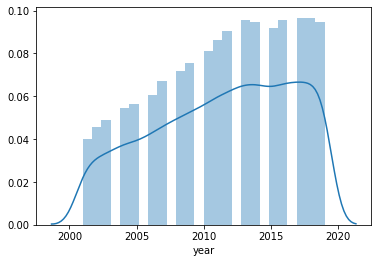

In [ ]:
import seaborn as sns
sns.distplot(data['year'])

In [ ]:
zips=data['ZIP CODE'].unique()

In [ ]:
type(zips)

numpy.ndarray

In [ ]:
for zip in zips:
  print(zip)
  print(data[data['ZIP CODE']==zip]['year'].value_counts())

60634.0
2019    11
2016    10
2009     9
2010     9
2015     8
2014     8
2013     8
2012     8
2011     8
2018     8
2017     8
2008     6
2007     6
2006     5
2005     5
2004     4
2003     3
2001     3
2002     2
Name: year, dtype: int64
60640.0
2018    49
2017    46
2019    45
2012    45
2016    43
2014    43
2011    43
2013    39
2015    38
2009    37
2008    36
2010    36
2007    32
2006    31
2004    27
2005    25
2003    24
2002    17
2001    13
Name: year, dtype: int64
60601.0
2017    39
2019    38
2018    37
2016    36
2013    36
2014    35
2015    34
2012    30
2011    28
2010    27
2009    24
2008    22
2002    22
2001    22
2004    21
2003    21
2005    20
2007    18
2006    16
Name: year, dtype: int64
60647.0
2019    62
2018    55
2017    52
2016    43
2014    42
2013    40
2012    39
2010    38
2015    36
2011    35
2009    31
2008    31
2007    28
2005    27
2006    26
2002    23
2004    22
2003    18
2001    17
Name: year, dtype: int64
60654.0
2019    75
2018    73
20

In [ ]:
y=[480, 551, 592, 658, 679, 729, 809, 864, 912, 976, 1037, 1092, 1152, 1139, 1107, 1152, 1165, 1164, 1142]

In [ ]:
x=[2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

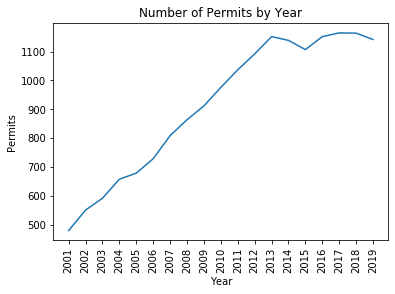

In [ ]:
plt.plot(x,y)
plt.xticks(x, x, rotation='vertical')
plt.xlabel('Year')
plt.ylabel('Permits')
plt.title('Number of Permits by Year')
plt.show()

In [ ]:
data['year'].value_counts()

2017    1165
2018    1164
2016    1152
2013    1152
2019    1142
2014    1139
2015    1107
2012    1092
2011    1037
2010     976
2009     912
2008     864
2007     809
2006     729
2005     679
2004     658
2003     592
2002     551
2001     480
Name: year, dtype: int64

In [ ]:
nbyyear = data.groupby(["ZIP CODE","year"])["year"].count()

In [ ]:
nbyyear

ZIP CODE  year
60601.0   2001    22
          2002    22
          2003    21
          2004    21
          2005    20
                  ..
60707.0   2015     3
          2016     3
          2017     2
          2018     3
          2019     1
Name: year, Length: 764, dtype: int64

In [ ]:
x

22

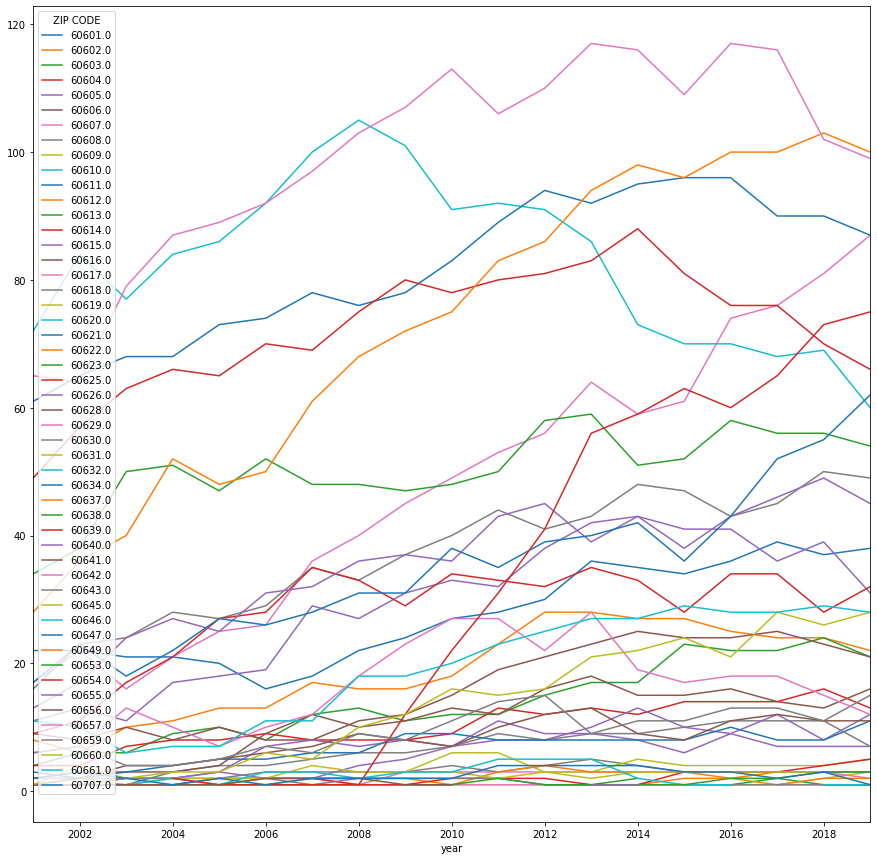

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
# use unstack()
data.groupby(["year","ZIP CODE"])['year'].count().unstack().plot(ax=ax)

In [ ]:
|gp.plot()

PERMIT NUMBER  ACCOUNT NUMBER  ...     Issued month
year                                 ...                 
2001        1012508           17373  ... 2001-09-17     9
2002        1020883          216997  ... 2002-09-11     9
2003        1029289          248799  ... 2003-09-05     9
2004        1037074          203624  ... 2004-09-29     9
2005        1046748          290451  ... 2005-11-15    11
2006        1056754           66022  ... 2006-12-06    12
2007        1067380          317549  ... 2007-10-31    10
2008        1081172          327170  ... 2008-10-16    10
2009        1088587          203385  ... 2009-11-16    11
2010        1093062          333028  ... 2010-09-10     9
2011        1098297           17658  ... 2011-11-01    11
2012        1102935          287445  ... 2012-10-02    10
2013        1108630          376612  ... 2013-09-19     9
2014        1115435           63414  ... 2014-10-15    10
2015        1120289           63414  ... 2015-11-09    11
2016        1124551          315635  ... 2016-10-05    10
2017        1129368          410695  ... 2017-08-31     8
2018        1135857          416351  ... 2018-09-24     9
2019        1142666          458934  ... 2019-11-25    11

[19 rows x 21 columns]

It seems as if the number of permits issued grew a lot from 2001 to 2011, and then became somewhat stagnant around 1150 from 2013-2019.

In [ ]:
data['month'] = pd.DatetimeIndex(data['Issued']).month

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data

PERMIT NUMBER  ACCOUNT NUMBER  SITE NUMBER  ...     Issued  year month
0            1142666          458934            1  ... 2019-11-25  2019    11
1            1142290          294900            4  ... 2019-10-15  2019    10
2            1142132          459163            1  ... 2019-09-20  2019     9
3            1142101          384478            1  ... 2019-09-20  2019     9
4            1142100          456144            1  ... 2019-09-19  2019     9
...              ...             ...          ...  ...        ...   ...   ...
17993        1003612          204664            1  ... 2001-08-01  2001     8
17994        1002993              51            1  ... 2001-04-04  2001     4
17995        1002652          203574            1  ... 2001-05-07  2001     5
17996        1001307          202156            1  ... 2001-06-18  2001     6
17997        1000571          201243            1  ... 2001-04-03  2001     4

[17400 rows x 22 columns]

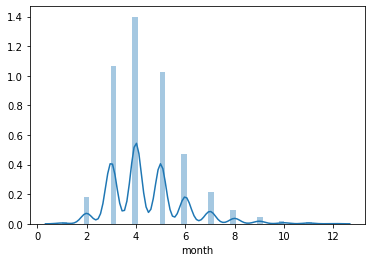

In [ ]:
sns.distplot(data['month'])

In [ ]:
data['month'].value_counts()

4     5357
3     4083
5     3930
6     1796
7      826
2      691
8      355
9      171
10      70
11      54
1       52
12      15
Name: month, dtype: int64

The most popular time to issue a permit was in the spring months- April, March, May, then June. After that, the number decreases notably.

In [ ]:
data['ZIP CODE'].value_counts()

60657.0    1888
60610.0    1571
60611.0    1553
60622.0    1390
60614.0    1373
60613.0     957
60607.0     908
60618.0     702
60640.0     669
60647.0     665
60654.0     565
60605.0     552
60625.0     533
60601.0     526
60661.0     363
60602.0     356
60642.0     309
60606.0     304
60603.0     264
60660.0     263
60616.0     205
60604.0     194
60659.0     171
60641.0     150
60608.0     130
60634.0     129
60615.0     121
60626.0     119
60630.0      55
60631.0      52
60707.0      47
60645.0      42
60646.0      40
60639.0      36
60629.0      34
60637.0      31
60643.0      21
60609.0      20
60653.0      18
60623.0      17
60612.0      17
60656.0      15
60617.0      13
60655.0       2
60620.0       2
60638.0       2
60632.0       2
60619.0       1
60649.0       1
60621.0       1
60628.0       1
Name: ZIP CODE, dtype: int64

In [ ]:
df = data['ZIP CODE'].value_counts().rename_axis('Zipcode').reset_index(name='cafe_permits')
print (df)

    Zipcode  cafe_permits
0   60657.0          1888
1   60610.0          1571
2   60611.0          1553
3   60622.0          1390
4   60614.0          1373
5   60613.0           957
6   60607.0           908
7   60618.0           702
8   60640.0           669
9   60647.0           665
10  60654.0           565
11  60605.0           552
12  60625.0           533
13  60601.0           526
14  60661.0           363
15  60602.0           356
16  60642.0           309
17  60606.0           304
18  60603.0           264
19  60660.0           263
20  60616.0           205
21  60604.0           194
22  60659.0           171
23  60641.0           150
24  60608.0           130
25  60634.0           129
26  60615.0           121
27  60626.0           119
28  60630.0            55
29  60631.0            52
30  60707.0            47
31  60645.0            42
32  60646.0            40
33  60639.0            36
34  60629.0            34
35  60637.0            31
36  60643.0            21
37  60609.0 

I wanted to see which neighborhoods have the most sidewalk cafes. I actually live in 60657, and can attest to how many sidewalk cafes there are on my local streets, but didn't know we had the most in the city. I would like to group all of these zipcodes by 'neighborhood' and perform further analysis on these, and whether these restaurants are repeat permit renewers.

In [ ]:
!pip install geopandas

     |████████████████████████████████| 931kB 2.8MB/s 
     |████████████████████████████████| 10.4MB 52.1MB/s 
     |████████████████████████████████| 14.7MB 311kB/s 


In [ ]:
import geopandas as gpd

In [ ]:
# set the filepath and load in a shapefile
#fp = “content/drive/My Drive/chicagoboundaries.shp”
map_df = gpd.read_file('/content/drive/My Drive/Boundaries.geojson')
# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
map_df.head()

objectid  ...                                           geometry
0       33  ...  MULTIPOLYGON (((-87.67762 41.91776, -87.67761 ...
1       34  ...  MULTIPOLYGON (((-87.72683 41.92265, -87.72693 ...
2       35  ...  MULTIPOLYGON (((-87.78500 41.90915, -87.78531 ...
3       36  ...  MULTIPOLYGON (((-87.66707 41.88885, -87.66707 ...
4       37  ...  MULTIPOLYGON (((-87.70656 41.89555, -87.70672 ...

[5 rows x 5 columns]

In [ ]:
map_df['zip']

0     60647
1     60639
2     60707
3     60622
4     60651
      ...  
56    60623
57    60629
58    60620
59    60637
60    60619
Name: zip, Length: 61, dtype: object

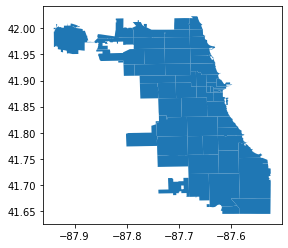

In [ ]:
map_df.plot()

In [ ]:
mapdata=pd.DataFrame(df)

In [ ]:
ziptest2 = mapdata.astype('int64', copy=False)

In [ ]:
ziptest2

Zipcode  cafe_permits
0     60657          1888
1     60610          1571
2     60611          1553
3     60622          1390
4     60614          1373
5     60613           957
6     60607           908
7     60618           702
8     60640           669
9     60647           665
10    60654           565
11    60605           552
12    60625           533
13    60601           526
14    60661           363
15    60602           356
16    60642           309
17    60606           304
18    60603           264
19    60660           263
20    60616           205
21    60604           194
22    60659           171
23    60641           150
24    60608           130
25    60634           129
26    60615           121
27    60626           119
28    60630            55
29    60631            52
30    60707            47
31    60645            42
32    60646            40
33    60639            36
34    60629            34
35    60637            31
36    60643            21
37    60609            20
38    60653            18
39    60623            17
40    60612            17
41    60656            15
42    60617            13
43    60655             2
44    60620             2
45    60638             2
46    60632             2
47    60619             1
48    60649             1
49    60621             1
50    60628             1

In [ ]:
map_df['zip']=map_df['zip'].astype('int64', copy=False)

In [ ]:
map_df

objectid  ...                                           geometry
0        33  ...  MULTIPOLYGON (((-87.67762 41.91776, -87.67761 ...
1        34  ...  MULTIPOLYGON (((-87.72683 41.92265, -87.72693 ...
2        35  ...  MULTIPOLYGON (((-87.78500 41.90915, -87.78531 ...
3        36  ...  MULTIPOLYGON (((-87.66707 41.88885, -87.66707 ...
4        37  ...  MULTIPOLYGON (((-87.70656 41.89555, -87.70672 ...
..      ...  ...                                                ...
56       57  ...  MULTIPOLYGON (((-87.69479 41.83008, -87.69486 ...
57       58  ...  MULTIPOLYGON (((-87.68306 41.75786, -87.68306 ...
58       59  ...  MULTIPOLYGON (((-87.62373 41.72167, -87.62388 ...
59       60  ...  MULTIPOLYGON (((-87.57691 41.79511, -87.57700 ...
60       61  ...  MULTIPOLYGON (((-87.58592 41.75150, -87.58592 ...

[61 rows x 5 columns]

In [ ]:
merged = (ziptest2.set_index('Zipcode')).join(map_df.set_index('zip'))
merged

cafe_permits objectid shape_area shape_len geometry
60601.0          526      NaN        NaN       NaN     None
60602.0          356      NaN        NaN       NaN     None
60603.0          264      NaN        NaN       NaN     None
60604.0          194      NaN        NaN       NaN     None
60605.0          552      NaN        NaN       NaN     None
60606.0          304      NaN        NaN       NaN     None
60607.0          908      NaN        NaN       NaN     None
60608.0          130      NaN        NaN       NaN     None
60609.0           20      NaN        NaN       NaN     None
60610.0         1571      NaN        NaN       NaN     None
60611.0         1553      NaN        NaN       NaN     None
60612.0           17      NaN        NaN       NaN     None
60613.0          957      NaN        NaN       NaN     None
60614.0         1373      NaN        NaN       NaN     None
60615.0          121      NaN        NaN       NaN     None
60616.0          205      NaN        NaN       NaN     None
60617.0           13      NaN        NaN       NaN     None
60618.0          702      NaN        NaN       NaN     None
60619.0            1      NaN        NaN       NaN     None
60620.0            2      NaN        NaN       NaN     None
60621.0            1      NaN        NaN       NaN     None
60622.0         1390      NaN        NaN       NaN     None
60623.0           17      NaN        NaN       NaN     None
60625.0          533      NaN        NaN       NaN     None
60626.0          119      NaN        NaN       NaN     None
60628.0            1      NaN        NaN       NaN     None
60629.0           34      NaN        NaN       NaN     None
60630.0           55      NaN        NaN       NaN     None
60631.0           52      NaN        NaN       NaN     None
60632.0            2      NaN        NaN       NaN     None
60634.0          129      NaN        NaN       NaN     None
60637.0           31      NaN        NaN       NaN     None
60638.0            2      NaN        NaN       NaN     None
60639.0           36      NaN        NaN       NaN     None
60640.0          669      NaN        NaN       NaN     None
60641.0          150      NaN        NaN       NaN     None
60642.0          309      NaN        NaN       NaN     None
60643.0           21      NaN        NaN       NaN     None
60645.0           42      NaN        NaN       NaN     None
60646.0           40      NaN        NaN       NaN     None
60647.0          665      NaN        NaN       NaN     None
60649.0            1      NaN        NaN       NaN     None
60653.0           18      NaN        NaN       NaN     None
60654.0          565      NaN        NaN       NaN     None
60655.0            2      NaN        NaN       NaN     None
60656.0           15      NaN        NaN       NaN     None
60657.0         1888      NaN        NaN       NaN     None
60659.0          171      NaN        NaN       NaN     None
60660.0          263      NaN        NaN       NaN     None
60661.0          363      NaN        NaN       NaN     None
60707.0           47      NaN        NaN       NaN     None

In [ ]:
merged_left = pd.merge(left=map_df, right=ziptest2, how='right', left_on='zip', right_on='Zipcode')
merged_left

objectid     shape_area  ... Zipcode  cafe_permits
0        33  106052287.488  ...   60647           665
1        34  127476050.762  ...   60639            36
2        35  45069038.4783  ...   60707            47
3        51  3450671.14336  ...   60707            47
4        36  70853834.3797  ...   60622          1390
5        38  23506055.7304  ...   60611          1553
6        39  166166339.096  ...   60638             2
7         1  49170578.9623  ...   60626           119
8         8  66565454.8469  ...   60615           121
9         9  104746821.074  ...   60621             1
10        2  62181473.5197  ...   60645            42
11       13  183013076.262  ...   60643            21
12       15  3136688.22496  ...   60643            21
13        3  37984388.8422  ...   60660           263
14        4  77305245.7089  ...   60640           669
15       32  94460631.8068  ...   60614          1373
16       41   107117591.88  ...   60631            52
17       42  117890054.124  ...   60646            40
18       43  345241692.171  ...   60628             1
19        5  105830918.023  ...   60625           533
20        6  113903341.112  ...   60641           150
21        7  63547755.9216  ...   60657          1888
22       11  80526076.0889  ...   60649             1
23       12  452837422.002  ...   60617            13
24       16  106718949.386  ...   60612            17
25       48  4294901.99439  ...   60604           194
26       47   89515884.463  ...   60656            15
27       49  115380139.149  ...   60655             2
28       19  4560228.98203  ...   60603           264
29       20  36301276.3485  ...   60605           552
30       21  67759827.8103  ...   60653            18
31       22  213490325.264  ...   60609            20
32       24  141235867.545  ...   60618           702
33       25  109667069.368  ...   60616           205
34       26   4847124.8171  ...   60602           356
35       27  9166245.79985  ...   60601           526
36       28  176505462.522  ...   60608           130
37       29  64664293.9426  ...   60607           908
38       30  9357755.68017  ...   60661           363
39       31  6766410.89809  ...   60606           304
40       45   131073763.12  ...   60630            55
41       46     47961494.4  ...   60642           309
42       50  69698411.4356  ...   60659           171
43       52  194062612.162  ...   60634           129
44       53  53990894.8848  ...   60613           957
45       54  31598157.0867  ...   60610          1571
46       55  15869961.3469  ...   60654           565
47       56  211755252.573  ...   60632             2
48       57  155285532.005  ...   60623            17
49       58  211114779.439  ...   60629            34
50       59  211696050.967  ...   60620             2
51       60  125424284.172  ...   60637            31
52       61  167872012.644  ...   60619             1

[53 rows x 7 columns]

In [ ]:
(column=variable, cmap=’Blues’, linewidth=0.8, ax=ax, edgecolor=’0.8')

In [ ]:
map_df['zip']

0     60647
1     60639
2     60707
3     60622
4     60651
      ...  
56    60623
57    60629
58    60620
59    60637
60    60619
Name: zip, Length: 61, dtype: object

In [ ]:
import matplotlib.pyplot as plt

Text(0.35, 0.05, 'Source: City of Chicago')

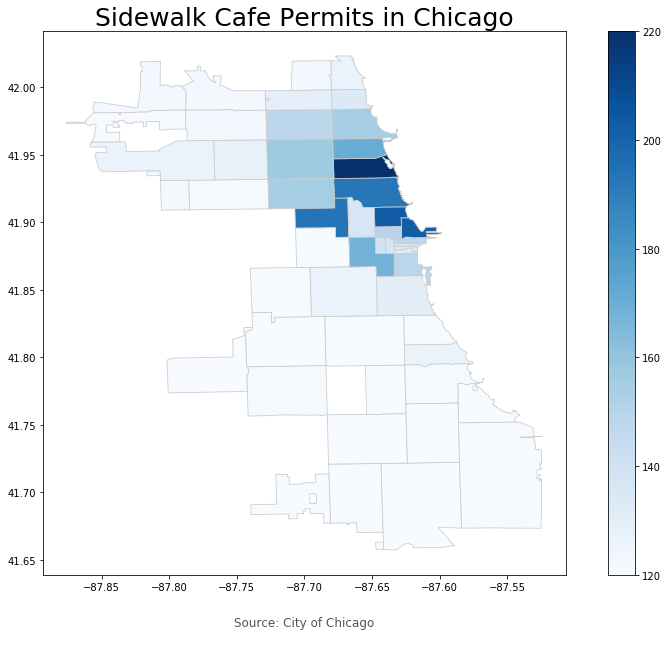

In [ ]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'cafe_permits'
# set the range for the choropleth
vmin, vmax = 120, 220
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(15, 10))
merged_left.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)
# add a title
ax.set_title('Sidewalk Cafe Permits in Chicago', fontdict={'fontsize': '25', 'fontweight' : '3'})
# create an annotation for the data source
ax.annotate('Source: City of Chicago',xy=(.35, .05),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')

In [ ]:
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)

In [ ]:
merged

In [ ]:
data['ACCOUNT NUMBER'].value_counts().head(40)

63414     790
65004     253
298727    108
50161      67
22633      61
230211     60
17658      48
66022      45
267891     45
207283     43
86212      37
85312      37
369504     35
207993     33
269555     31
290569     30
5948       29
269043     29
22622      27
2962       26
5466       26
331323     25
254059     24
10057      24
14172      23
85630      21
3066       21
210267     20
5350       20
64797      20
9454       20
3085       19
17500      19
23957      19
242        19
11179      19
4488       19
8020       19
14614      19
63726      19
Name: ACCOUNT NUMBER, dtype: int64

In [ ]:
data[data['ACCOUNT NUMBER']==17500]

PERMIT NUMBER  ACCOUNT NUMBER  SITE NUMBER  ...     Issued  year month
996          1137849           17500            1  ... 2019-02-26  2019     2
2146         1131501           17500            1  ... 2018-04-06  2018     4
3463         1126077           17500            1  ... 2017-03-30  2017     3
4621         1121614           17500            1  ... 2016-03-08  2016     3
5475         1117551           17500            1  ... 2015-04-14  2015     4
6741         1111577           17500            1  ... 2014-03-24  2014     3
8234         1104564           17500            1  ... 2013-03-29  2013     3
9375         1099587           17500            1  ... 2012-03-08  2012     3
9859         1096093           17500            1  ... 2011-04-21  2011     4
11476        1089826           17500            1  ... 2010-03-05  2010     3
12140        1086245           17500            1  ... 2009-03-30  2009     3
12945        1073589           17500            1  ... 2008-04-04  2008     4
13410        1062701           17500            1  ... 2007-05-16  2007     5
14559        1050148           17500            1  ... 2006-04-26  2006     4
15462        1041984           17500            1  ... 2005-04-22  2005     4
16020        1033233           17500            1  ... 2004-04-13  2004     4
16464        1026825           17500            1  ... 2003-06-23  2003     6
17260        1016660           17500            1  ... 2002-04-19  2002     4
17717        1009335           17500            1  ... 2001-05-22  2001     5

[19 rows x 22 columns]

In [ ]:
data[data['ACCOUNT NUMBER']==65004]

PERMIT NUMBER  ACCOUNT NUMBER  SITE NUMBER  ...     Issued  year month
1055         1137736           65004           29  ... 2019-03-08  2019     3
1056         1137735           65004            1  ... 2019-03-08  2019     3
1057         1137734           65004           12  ... 2019-03-08  2019     3
1058         1137733           65004           11  ... 2019-03-08  2019     3
1059         1137732           65004           13  ... 2019-03-08  2019     3
...              ...             ...          ...  ...        ...   ...   ...
16209        1032600           65004           10  ... 2004-03-30  2004     3
16324        1028470           65004           15  ... 2003-08-01  2003     8
16848        1025312           65004            1  ... 2003-04-29  2003     4
16944        1021741           65004           10  ... 2003-04-29  2003     4
17819        1008795           65004            1  ... 2001-04-12  2001     4

[253 rows x 22 columns]

In [ ]:
#Data Dictionary
print('Number of unique permit numbers:',data['permit'].nunique())
print('Number of unique account numbers:',data['account'].nunique(dropna='TRUE'))
print('Site Numbers:',data['site'].unique())
print('Number of legal names:',data['legname'.nunique())
print('Number of business names:',busname.nunique()) 
print('Number of issued dates:',issdate.nunique(dropna='TRUE'))
print('Expiration dates:',expdate.unique())
print('Number of payment dates:',paydate.nunique())
print('Number of addresses:',address.nunique())
print('Street direction:', stdir.unique())
print('Street name:', street.unique())
print('Street type:', sttype.unique())
print('City:',city.unique())
print('State:',state.unique())
print('Zip Code:',zipcode.unique())
print('Ward:',ward.unique())
print('Precinct:',precinct.unique())
print('Number of ward-precincts:', wardprec.nunique())
print('Police District:',police.unique())
print('Number of Community Areas:',community.unique())
#The rest of the variables are not relevant to this project.